<a href="https://colab.research.google.com/github/sudharb/MINST/blob/main/customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df["Geography"]

0        France
1         Spain
2        France
3        France
4         Spain
         ...   
9995     France
9996     France
9997     France
9998    Germany
9999     France
Name: Geography, Length: 10000, dtype: object

In [ ]:
df.drop("RowNumber",axis='columns', inplace=True)

In [ ]:
df.drop("CustomerId",axis='columns', inplace=True)

In [ ]:
df.dtypes

Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.drop("Surname",axis='columns', inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


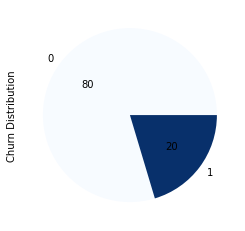

In [ ]:
class_series = df.groupby("Exited").size()
class_series.name = "Churn Distribution"
class_series.plot.pie(autopct="%2.f",cmap="Blues")
plt.show()

In [ ]:
cust_exited=df[df.Exited==1].Tenure
cust_notexit=df[df.Exited==0].Tenure

2037


In [ ]:
cust_e=df[df.Exited==1]
cust_n=df[df.Exited==0]
cust_e.shape
cust_n.shape

(7963, 11)

(4074, 13)

0    2037
1    2037
Name: Exited, dtype: int64


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


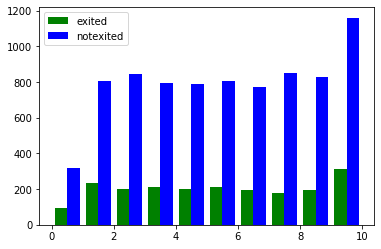

In [ ]:
plt.hist([cust_exited,cust_notexit], color=['green','blue'],label=['exited','notexited'])
plt.legend()

In [ ]:
cust_credit1=df[df.Exited==1].CreditScore
cust_credit2=df[df.Exited==0].CreditScore

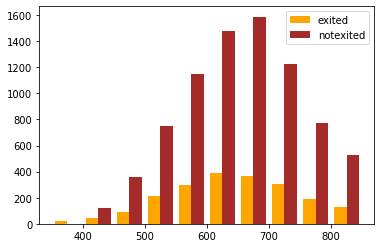

In [ ]:
plt.hist([cust_credit1,cust_credit2], color=['orange','brown'],label=['exited','notexited'])
plt.legend()

In [ ]:
df1 = pd.get_dummies(df['Gender'])
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Female           10000 non-null  uint8  
 12  Male             10000 non-null  uint8  
dtypes: float64(2), int64(7), object(2), uint8(2)
memory usage: 879.0+ KB


In [ ]:
df2=df[["CreditScore","Geography","Age","Tenure","Female","Male","IsActiveMember","Exited"]].copy()
df2

,CreditScore,Geography,Age,Tenure,Female,Male,IsActiveMember,Exited
0,619,France,42,2,1,0,1,1
1,608,Spain,41,1,1,0,1,0
2,502,France,42,8,1,0,0,1
3,699,France,39,1,1,0,0,0
4,850,Spain,43,2,1,0,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0,1,0,0
9996,516,France,35,10,0,1,1,0
9997,709,France,36,7,1,0,1,1
9998,772,Germany,42,3,0,1,0,1


In [ ]:
df3 = pd.get_dummies(df2['Geography'])
df3= pd.concat([df2, df3], axis=1).reindex(df.index)
df3.drop('Geography',axis=1,inplace=True)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CreditScore     10000 non-null  int64
 1   Age             10000 non-null  int64
 2   Tenure          10000 non-null  int64
 3   Female          10000 non-null  uint8
 4   Male            10000 non-null  uint8
 5   IsActiveMember  10000 non-null  int64
 6   Exited          10000 non-null  int64
 7   France          10000 non-null  uint8
 8   Germany         10000 non-null  uint8
 9   Spain           10000 non-null  uint8
dtypes: int64(5), uint8(5)
memory usage: 439.6 KB


In [ ]:
country1=df3.Spain.value_counts()
country2=df3.France.value_counts()
country3=df3.Germany.value_counts()

In [ ]:
cust_country1=df3[df3.Exited==1].Spain
cust_country1s=df3[df3.Exited==0].Spain
cust_country2=df3[df3.Exited==1].France
cust_country2s=df3[df3.Exited==0].France
cust_country3=df3[df3.Exited==1].Germany
cust_country3s=df3[df3.Exited==0].Germany

<function matplotlib.pyplot.legend(*args, **kwargs)>

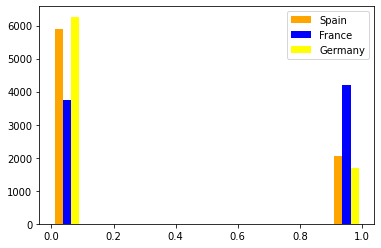

In [ ]:
plt.hist([cust_country1,cust_country2,cust_country3], color=['orange','blue','yellow'],label=['Spain','France','Germany'])
plt.legend()
plt.hist([cust_country1s,cust_country2s,cust_country3s], color=['orange','blue','yellow'],label=['exited','notexited'])
plt.legend

In [ ]:
country1

0    7523
1    2477
Name: Spain, dtype: int64

In [ ]:
df3.CreditScore.min()
df4=df3[["CreditScore","Age","Tenure","Spain","France","Germany","Exited"]].copy()

In [ ]:
cols_to_scale=['CreditScore','Age','Tenure']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df4[cols_to_scale]=scaler.fit_transform(df4[cols_to_scale])


In [ ]:
df4

,CreditScore,Age,Tenure,Spain,France,Germany,Exited
0,0.538,0.324324,0.2,0,1,0,1
1,0.516,0.310811,0.1,1,0,0,0
2,0.304,0.324324,0.8,0,1,0,1
3,0.698,0.283784,0.1,0,1,0,0
4,1.000,0.337838,0.2,1,0,0,0
...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0,1,0,0
9996,0.332,0.229730,1.0,0,1,0,0
9997,0.718,0.243243,0.7,0,1,0,1
9998,0.844,0.324324,0.3,0,0,1,1


In [ ]:
count_class0,count_class1=df4.Exited.value_counts()
print(count_class1)

2037


In [ ]:
cust_e=df4[df4.Exited==1]
cust_n=df4[df4.Exited==0]
cust_e.shape
cust_n.shape

(7963, 7)

In [ ]:
cust_n.sample(count_class1).shape
df_class0_under=cust_n.sample(count_class1)
df_under=pd.concat([df_class0_under,cust_e],axis=0)
df_under.shape

(4074, 7)

In [ ]:
print(df_under.Exited.value_counts())

0    2037
1    2037
Name: Exited, dtype: int64


In [ ]:
X1=df_under.drop('Exited',axis='columns')
y1=df_under['Exited']

In [ ]:
X=df4.drop('Exited',axis='columns')
y=df3['Exited']
X.isnull().sum()
X

,CreditScore,Age,Tenure,Spain,France,Germany
0,0.538,0.324324,0.2,0,1,0
1,0.516,0.310811,0.1,1,0,0
2,0.304,0.324324,0.8,0,1,0
3,0.698,0.283784,0.1,0,1,0
4,1.000,0.337838,0.2,1,0,0
...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0,1,0
9996,0.332,0.229730,1.0,0,1,0
9997,0.718,0.243243,0.7,0,1,0
9998,0.844,0.324324,0.3,0,0,1


In [ ]:
y.isnull().sum()
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X1=X1.to_numpy()
y1=y1.to_numpy()

In [ ]:
X=X.to_numpy()
y=y.to_numpy()


In [ ]:
X.size

40000

In [ ]:
y.size

10000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [ ]:
y_train.size

2851

In [ ]:
def softmax(h):
  return (np.exp(h.T)/np.sum(np.exp(h),axis=1)).T

def cross_entropy(Y, P_hat):
  return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)  

def indices_to_one_hot(data, nb_classes):
  targets= np.array(data).reshape(-1)
  return np.eye(nb_classes)[targets]

def accuracy(y,y_hat):
  return np.mean(y==y_hat)


In [ ]:
class MVLogisticRegression():
    
    def fit(self,X,y,eta=5e-1,epochs=2e3,show_curve=False):
        epochs=int(epochs)
        N,D=X.shape
        k=len(np.unique(y))
        y_values=np.unique(y,return_index=False)
        Y=indices_to_one_hot(y,k).astype(int)
        ##weights and biases initialising
        self.W=np.random.randn(D,k)
        self.B=np.random.randn(N,k)
        J=np.zeros(epochs)
        
        for epoch in range(epochs):
            P_hat=self.__forward__(X)
            J[epoch]=cross_entropy(Y,P_hat)
            self.W-=eta*(1/N)*X.T@(P_hat-Y)
            self.B-=eta*(1/N)*np.sum(P_hat-Y,axis=0)
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training curve")
            plt.show()
            
    def __forward__(self,X):
            return softmax(X@self.W+self.B)
        
    def predict(self,X):
            return np.argmax(self.__forward__(X),axis=1)

In [ ]:
multlogreg = MVLogisticRegression()

In [ ]:
X_train.size

28000

In [ ]:
y_train.size

7000

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_test,y_test)

LogisticRegression()

In [ ]:
pred=lg.predict(X_test)

In [ ]:
#@title Default title text
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       619
           1       0.68      0.64      0.66       604

    accuracy                           0.68      1223
   macro avg       0.68      0.68      0.68      1223
weighted avg       0.68      0.68      0.68      1223



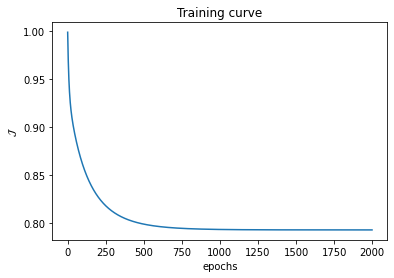

In [ ]:
multlogreg.fit(X_train,y_train, show_curve=True)

In [ ]:
y_hat=multlogreg.predict(X_train)


In [ ]:
accuracy(y_train,y_hat)

0.6131182041388986

In [ ]:
targets=y_hat
np.eye(100)[targets]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_train, y_hat)
print(cf)

[[876 542]
 [561 872]]


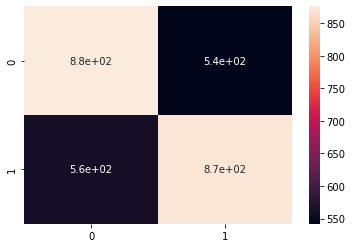

In [ ]:
import seaborn as sns
sns.heatmap(cf, annot=True)

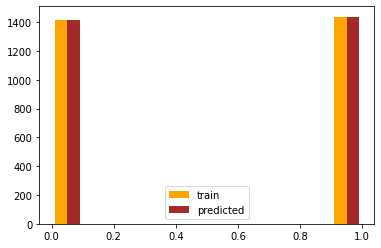

In [ ]:
plt.hist([y_train,y_hat], color=['orange','brown'],label=['train','predicted'])
plt.legend()

(array([1437.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1414.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

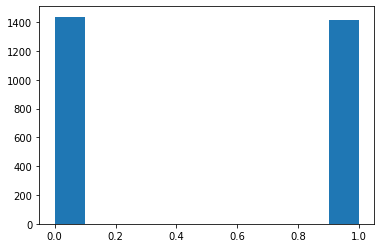

In [ ]:
plt.hist([y_hat])